In [2]:
from pathlib import Path

def count_missing_labels(dataset_path: Path):
    if not dataset_path.exists() or not dataset_path.is_dir():
        raise FileNotFoundError(f"No dataset directory exists at {dataset_path.absolute()}")

    splits = ["train", "val", "test"]
    missing_labels_counts = {split: 0 for split in splits}

    for split in splits:
        images_split_path = dataset_path / "images" / split
        labels_split_path = dataset_path / "labels" / split

        if not images_split_path.exists() or not labels_split_path.exists():
            print(f"Skipping {split} as the path does not exist.")
            continue

        for image_path in images_split_path.glob("*.jpg"):
            corresponding_label_path = labels_split_path / f"{image_path.stem}.txt"
            if not corresponding_label_path.exists():
                missing_labels_counts[split] += 1

    return missing_labels_counts

# Path to your dataset directory
dataset_path = Path("data/original_dataset")

# Check if dataset path exists
if not dataset_path.exists() or not dataset_path.is_dir():
    raise FileNotFoundError(f"No dataset directory exists at {dataset_path.absolute()}")

# Count missing labels
missing_labels_counts = count_missing_labels(dataset_path)

# Display the results
for split, count in missing_labels_counts.items():
    print(f"Number of missing labels in {split}: {count}")

Skipping val as the path does not exist.
Number of missing labels in train: 630
Number of missing labels in val: 0
Number of missing labels in test: 0


Original Images: 2410
Original Labels: 1300
Photo Only Images: 1289
Photo Only Labels: 1289
Cartoon Only Images: 9
Cartoon Only Labels: 9
Missing Labels: 1112


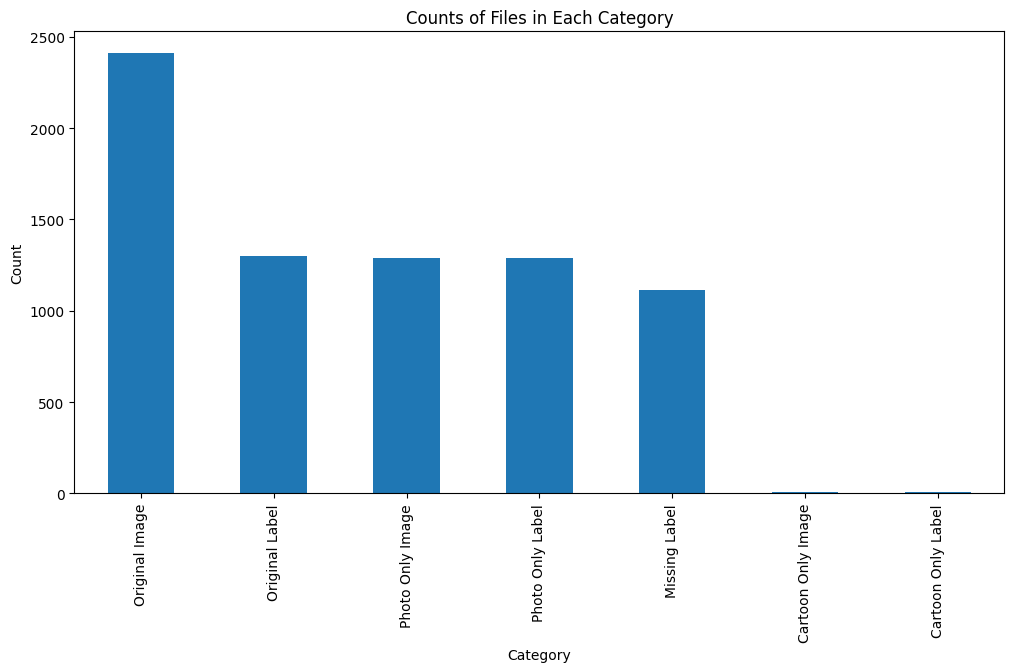

Images missing in Photo Only Dataset: 2410
Labels missing in Photo Only Dataset: 1300
Images missing in Cartoon Only Dataset: 2410
Labels missing in Cartoon Only Dataset: 1300

Train Split:
Original Images: 1687
Photo Only Images: 1051
Cartoon Only Images: 6

Val Split:
Original Images: 482
Photo Only Images: 0
Cartoon Only Images: 0

Test Split:
Original Images: 241
Photo Only Images: 238
Cartoon Only Images: 3


In [3]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
original_dataset_path = Path('data/original_dataset')
photo_only_path = original_dataset_path.parent / f"{original_dataset_path.name}_photo_only"
cartoon_only_path = original_dataset_path.parent / f"{original_dataset_path.name}_cartoon_only"
missing_labels_log_path = photo_only_path / 'missing_labels.txt'

# Function to get all files in a directory
def get_files_in_directory(directory):
    return sorted([f for f in directory.glob('**/*') if f.is_file()])

# Load files from the original, photo-only, and cartoon-only directories
original_images = get_files_in_directory(original_dataset_path / 'images')
original_labels = get_files_in_directory(original_dataset_path / 'labels')
photo_only_images = get_files_in_directory(photo_only_path / 'images')
photo_only_labels = get_files_in_directory(photo_only_path / 'labels')
cartoon_only_images = get_files_in_directory(cartoon_only_path / 'images')
cartoon_only_labels = get_files_in_directory(cartoon_only_path / 'labels')

# Load missing labels from the log file
with open(missing_labels_log_path, 'r') as file:
    missing_labels = file.read().splitlines()

# Display the counts
print(f"Original Images: {len(original_images)}")
print(f"Original Labels: {len(original_labels)}")
print(f"Photo Only Images: {len(photo_only_images)}")
print(f"Photo Only Labels: {len(photo_only_labels)}")
print(f"Cartoon Only Images: {len(cartoon_only_images)}")
print(f"Cartoon Only Labels: {len(cartoon_only_labels)}")
print(f"Missing Labels: {len(missing_labels)}")

# Convert to DataFrames for easier comparison
original_images_df = pd.DataFrame({'Path': [str(p) for p in original_images], 'Type': 'Original Image'})
original_labels_df = pd.DataFrame({'Path': [str(p) for p in original_labels], 'Type': 'Original Label'})
photo_only_images_df = pd.DataFrame({'Path': [str(p) for p in photo_only_images], 'Type': 'Photo Only Image'})
photo_only_labels_df = pd.DataFrame({'Path': [str(p) for p in photo_only_labels], 'Type': 'Photo Only Label'})
cartoon_only_images_df = pd.DataFrame({'Path': [str(p) for p in cartoon_only_images], 'Type': 'Cartoon Only Image'})
cartoon_only_labels_df = pd.DataFrame({'Path': [str(p) for p in cartoon_only_labels], 'Type': 'Cartoon Only Label'})
missing_labels_df = pd.DataFrame({'Path': missing_labels, 'Type': 'Missing Label'})

# Combine DataFrames
combined_df = pd.concat([
    original_images_df, 
    original_labels_df, 
    photo_only_images_df, 
    photo_only_labels_df, 
    cartoon_only_images_df, 
    cartoon_only_labels_df, 
    missing_labels_df
])

# Display combined DataFrame
combined_df.head()

# Compare and visualize differences

# Plot counts of each type
counts = combined_df['Type'].value_counts()
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('Counts of Files in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Find missing images that are in original but not in photo only
missing_in_photo_only = original_images_df[~original_images_df['Path'].isin(photo_only_images_df['Path'])]
print(f"Images missing in Photo Only Dataset: {len(missing_in_photo_only)}")

# Find labels that are in original but not in photo only
missing_labels_in_photo_only = original_labels_df[~original_labels_df['Path'].isin(photo_only_labels_df['Path'])]
print(f"Labels missing in Photo Only Dataset: {len(missing_labels_in_photo_only)}")

# Find images that are in original but not in cartoon only
missing_in_cartoon_only = original_images_df[~original_images_df['Path'].isin(cartoon_only_images_df['Path'])]
print(f"Images missing in Cartoon Only Dataset: {len(missing_in_cartoon_only)}")

# Find labels that are in original but not in cartoon only
missing_labels_in_cartoon_only = original_labels_df[~original_labels_df['Path'].isin(cartoon_only_labels_df['Path'])]
print(f"Labels missing in Cartoon Only Dataset: {len(missing_labels_in_cartoon_only)}")

# Detailed counts for each split
splits = ['train', 'val', 'test']

for split in splits:
    original_split_images = get_files_in_directory(original_dataset_path / 'images' / split)
    photo_only_split_images = get_files_in_directory(photo_only_path / 'images' / split)
    cartoon_only_split_images = get_files_in_directory(cartoon_only_path / 'images' / split)
    
    print(f"\n{split.capitalize()} Split:")
    print(f"Original Images: {len(original_split_images)}")
    print(f"Photo Only Images: {len(photo_only_split_images)}")
    print(f"Cartoon Only Images: {len(cartoon_only_split_images)}")